name : omar ramadan abbas ragheb

Problem Description

we have a dataset of the sales of E-commerce website ,so i will do some analytics on it and exttract the needed insights from it 

Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline



from pandas import ExcelWriter
from pandas import ExcelFile


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

In [2]:
import seaborn as sns
sns.__version__

'0.11.0'

Read dataset

In [3]:
df = pd.read_excel('Online Retail.xlsx', encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


EDA

In [5]:
missing_percentage = df.isnull().sum()*100/len(df)
print(missing_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [6]:
df=df[df['CustomerID'].notna()]

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Country that makes the most transactions

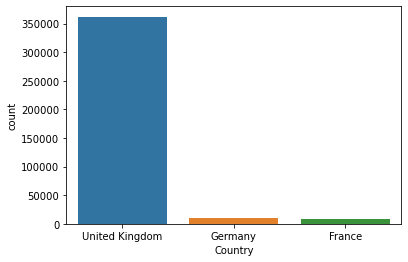

In [8]:
ax = sns.countplot(x="Country", data=df,order=df.Country.value_counts().iloc[:3].index)

Calculate the Total Revenue for each Row

In [9]:
Revenue = df['Quantity']*df['UnitPrice'] 
df['Revenue'] = Revenue
df_top_10 = {'CustomerID':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].index,
            'Revenue':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].values}

Show the Top 10 Customers how made the largest Revenue

In [10]:
df_top_10 = pd.DataFrame(df_top_10)
print(df_top_10)

  CustomerID    Revenue
0      14646  279489.02
1      18102  256438.49
2      17450  187482.17
3      14911  132572.62
4      12415  123725.45
5      14156  113384.14
6      17511   88125.38
7      16684   65892.08
8      13694   62653.10
9      15311   59419.34


Show Top 5 frequent Customers

In [17]:
df.CustomerID.value_counts().head(5)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
Name: CustomerID, dtype: int64

Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

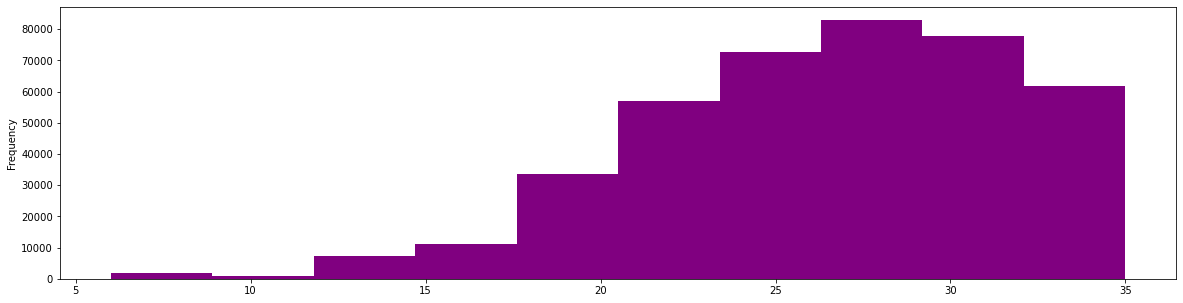

In [11]:
df['Description'].str.len().plot(kind='hist',color='purple',figsize=(20,5),x='Description Length',y='count')

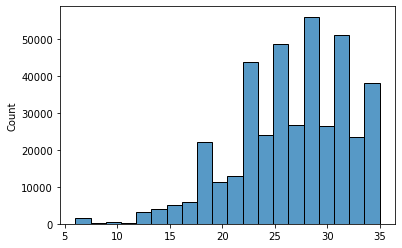

In [12]:
freq = df['Description']
freq=freq.str.len()
sns.histplot(data='freq',x=freq.values,bins=20)

Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature

In [13]:
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] =  df.InvoiceDate.dt.quarter
df["Month"] =  df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] =  df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] =  df.InvoiceDate.dt.date

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


Aggregate Revenue & Quantity across the grouped_features

In [15]:
grouped_features=['Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode','Description']

In [16]:
daily_data = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),columns=["Quantity"])
daily_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
daily_data

Quantity  \
Year Quarter Month Week Weekday Dayofyear Day StockCode Description                                    
2010 4       12    48   2       335       1   10002     INFLATABLE POLITICAL GLOBE                60   
                                              10125     MINI FUNKY DESIGN TAPES                    2   
                                              10133     COLOURING PENCILS BROWN TUBE               5   
                                              16014     SMALL CHINESE STYLE SCISSOR               10   
                                              16016     LARGE CHINESE STYLE SCISSOR               10   
...                                                                                              ...   
2011 4       12    49   4       343       9   85099B    JUMBO BAG RED RETROSPOT                   10   
                                              85099C    JUMBO  BAG BAROQUE BLACK WHITE            10   
                                              85123A    CREAM HANGING HEART T-LIGHT HOLDER         1   
                                              M         Manual                                    -1   
                                              POST      POSTAGE                                    9   

                                                                                            Revenue  
Year Quarter Month Week Weekday Dayofyear Day StockCode Description                                  
2010 4       12    48   2       335       1   10002     INFLATABLE POLITICAL GLOBE            51.00  
                                              10125     MINI FUNKY DESIGN TAPES                1.70  
                                              10133     COLOURING PENCILS BROWN TUBE           4.25  
                                              16014     SMALL CHINESE STYLE SCISSOR            4.20  
                                              16016     LARGE CHINESE STYLE SCISSOR            8.50  
...                                                                                             ...  
2011 4       12    49   4       343       9   85099B    JUMBO BAG RED RETROSPOT               20.80  
                                              85099C    JUMBO  BAG BAROQUE BLACK WHITE        17.90  
                                              85123A    CREAM HANGING HEART T-LIGHT HOLDER     2.95  
                                              M         Manual                              -224.69  
                                              POST      POSTAGE                              159.00  

[225957 rows x 2 columns]